## *Juliana Valdez | 216157 | Final Project*

# Insurance Fraud Detection

In [107]:
# Mount GDrive to the Colab instance
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [109]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

### Importing the Dataset

In [110]:
df = pd.read_csv('/content/drive/My Drive/[4] (24-25) Senior Year/[2] FIRST SEM/[M] CSCI 114/CSCI114_FinalProject_Group3/CSCI114_FinalProject_Group3_Data.csv')

In [111]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


#### Pre-processing the Dataset

In [112]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

## Missing Values

In [114]:
df.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [115]:
# '?' Invalid Values

df.replace('?', np.nan, inplace = True)

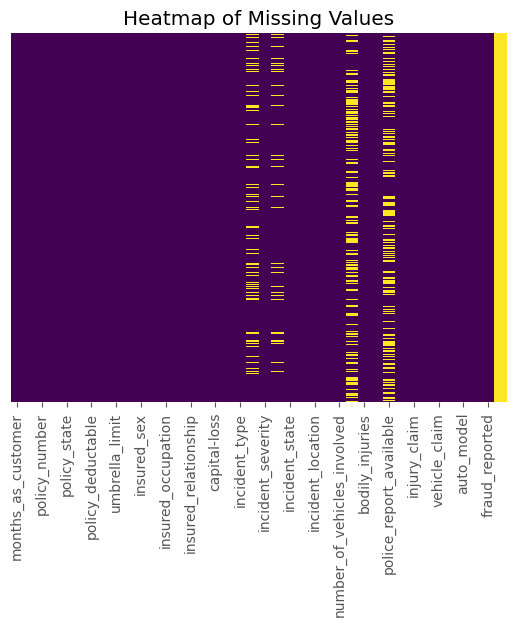

In [116]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [117]:
# Missing Values
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [118]:
# Cutting Irrelevant Columns

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','authorities_contacted',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [119]:
df.isna().sum().sum()

0

### Irrelevant Columns

In [120]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


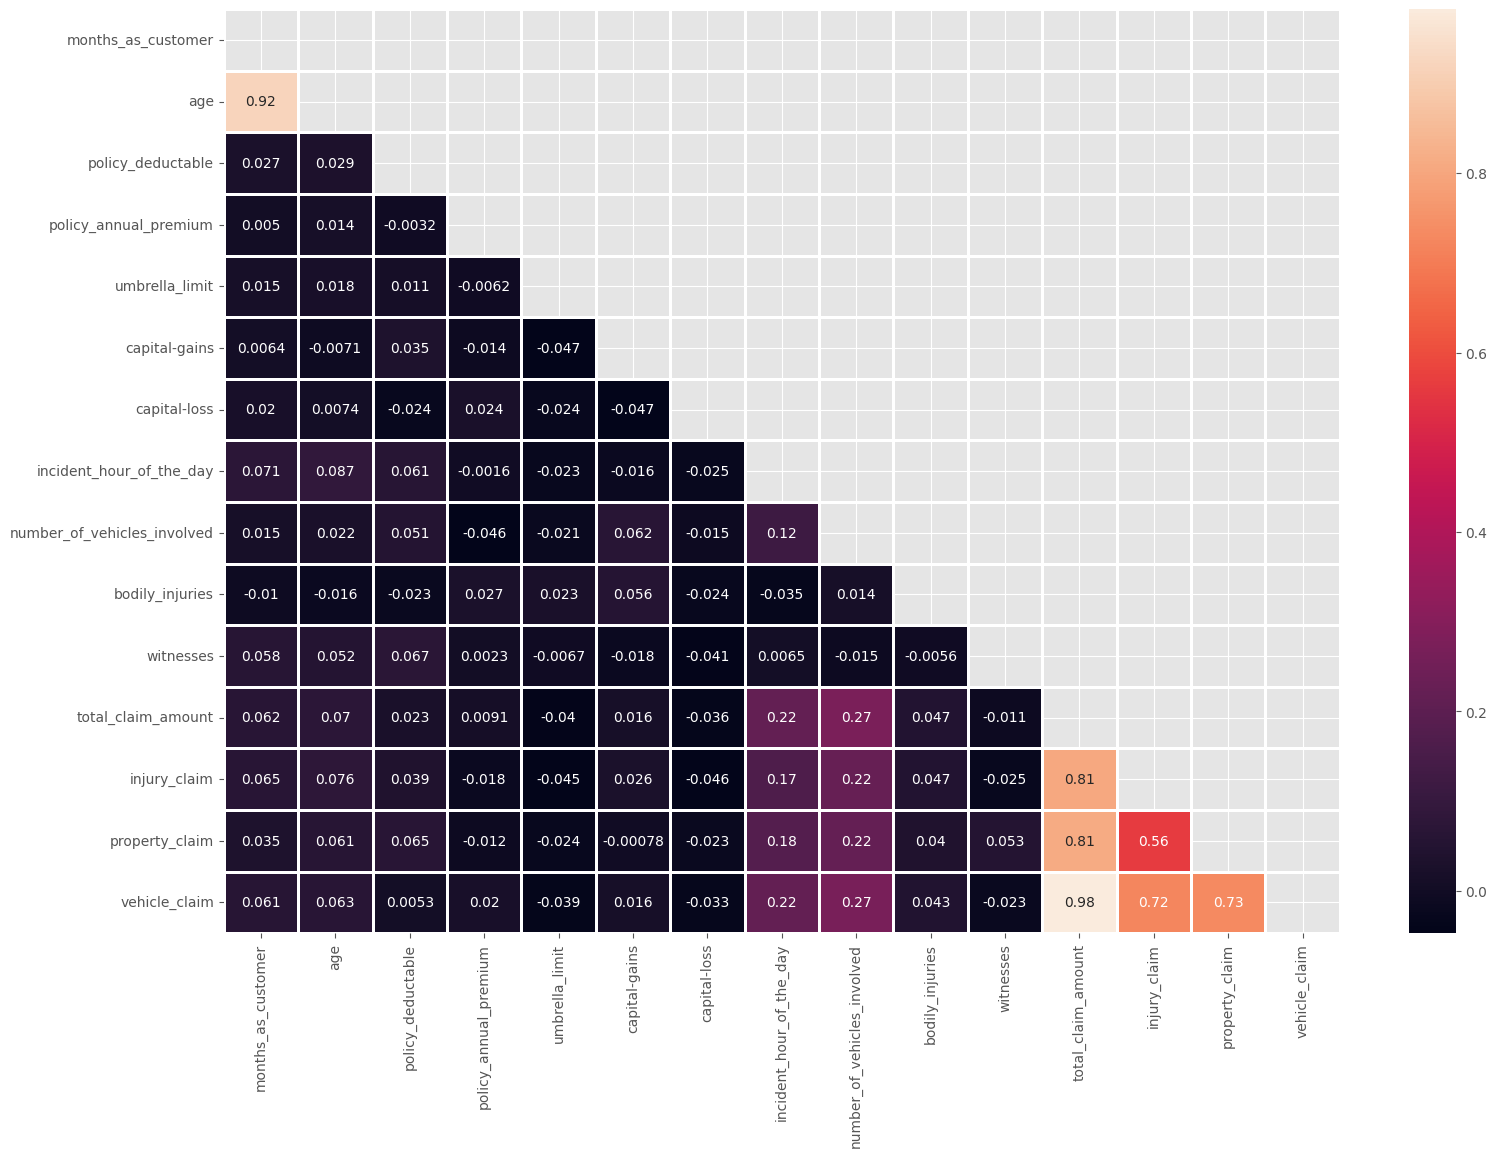

In [121]:
plt.figure(figsize = (18, 12))

numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [122]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

### Separating Feature and Label

In [123]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

## Handling Categorical Columns

In [124]:
cat_df = X.select_dtypes(include = ['object'])
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [125]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [126]:
num_df = X.select_dtypes(include = ['int64'])

In [127]:
X = pd.concat([num_df, cat_df], axis = 1)
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,True,False,False,False,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,False,False,True,True,False,True,False,False,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,False,False,False,True,False,True,False,False,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,True,False,False,False,False,False,False,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,False,False,True,True,False,True,False,False,False,False


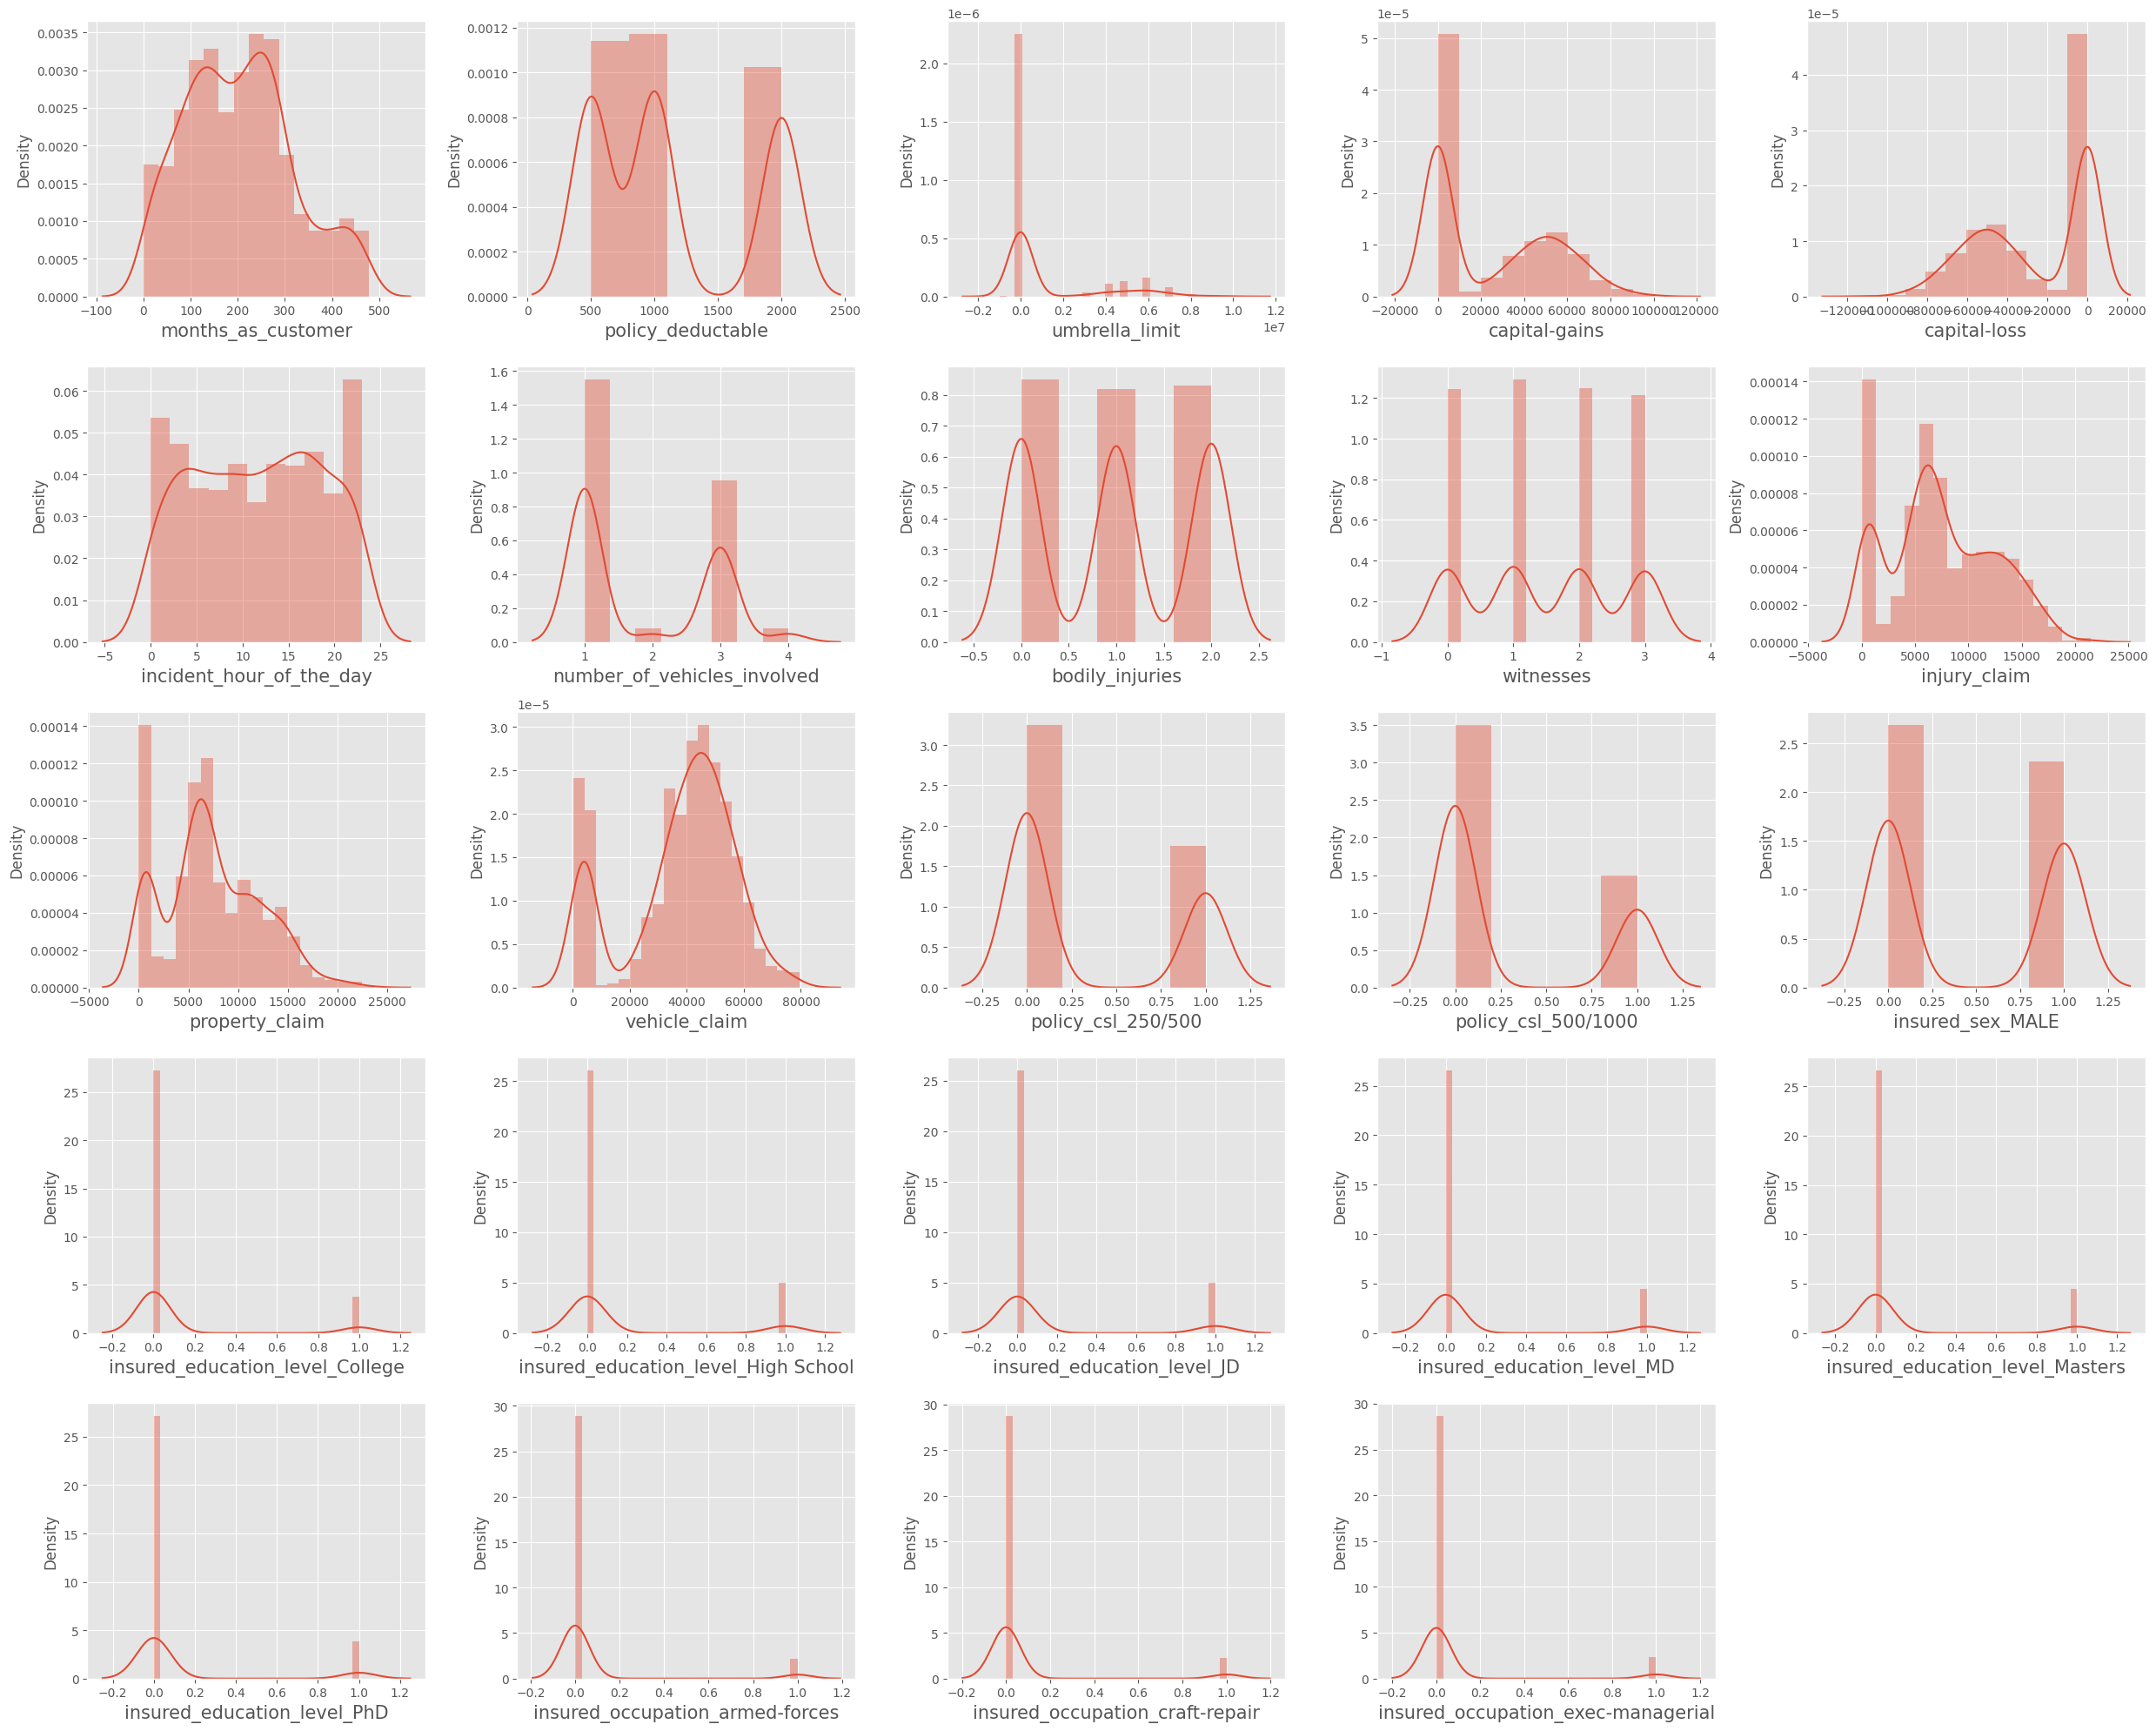

In [128]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

## Outliers

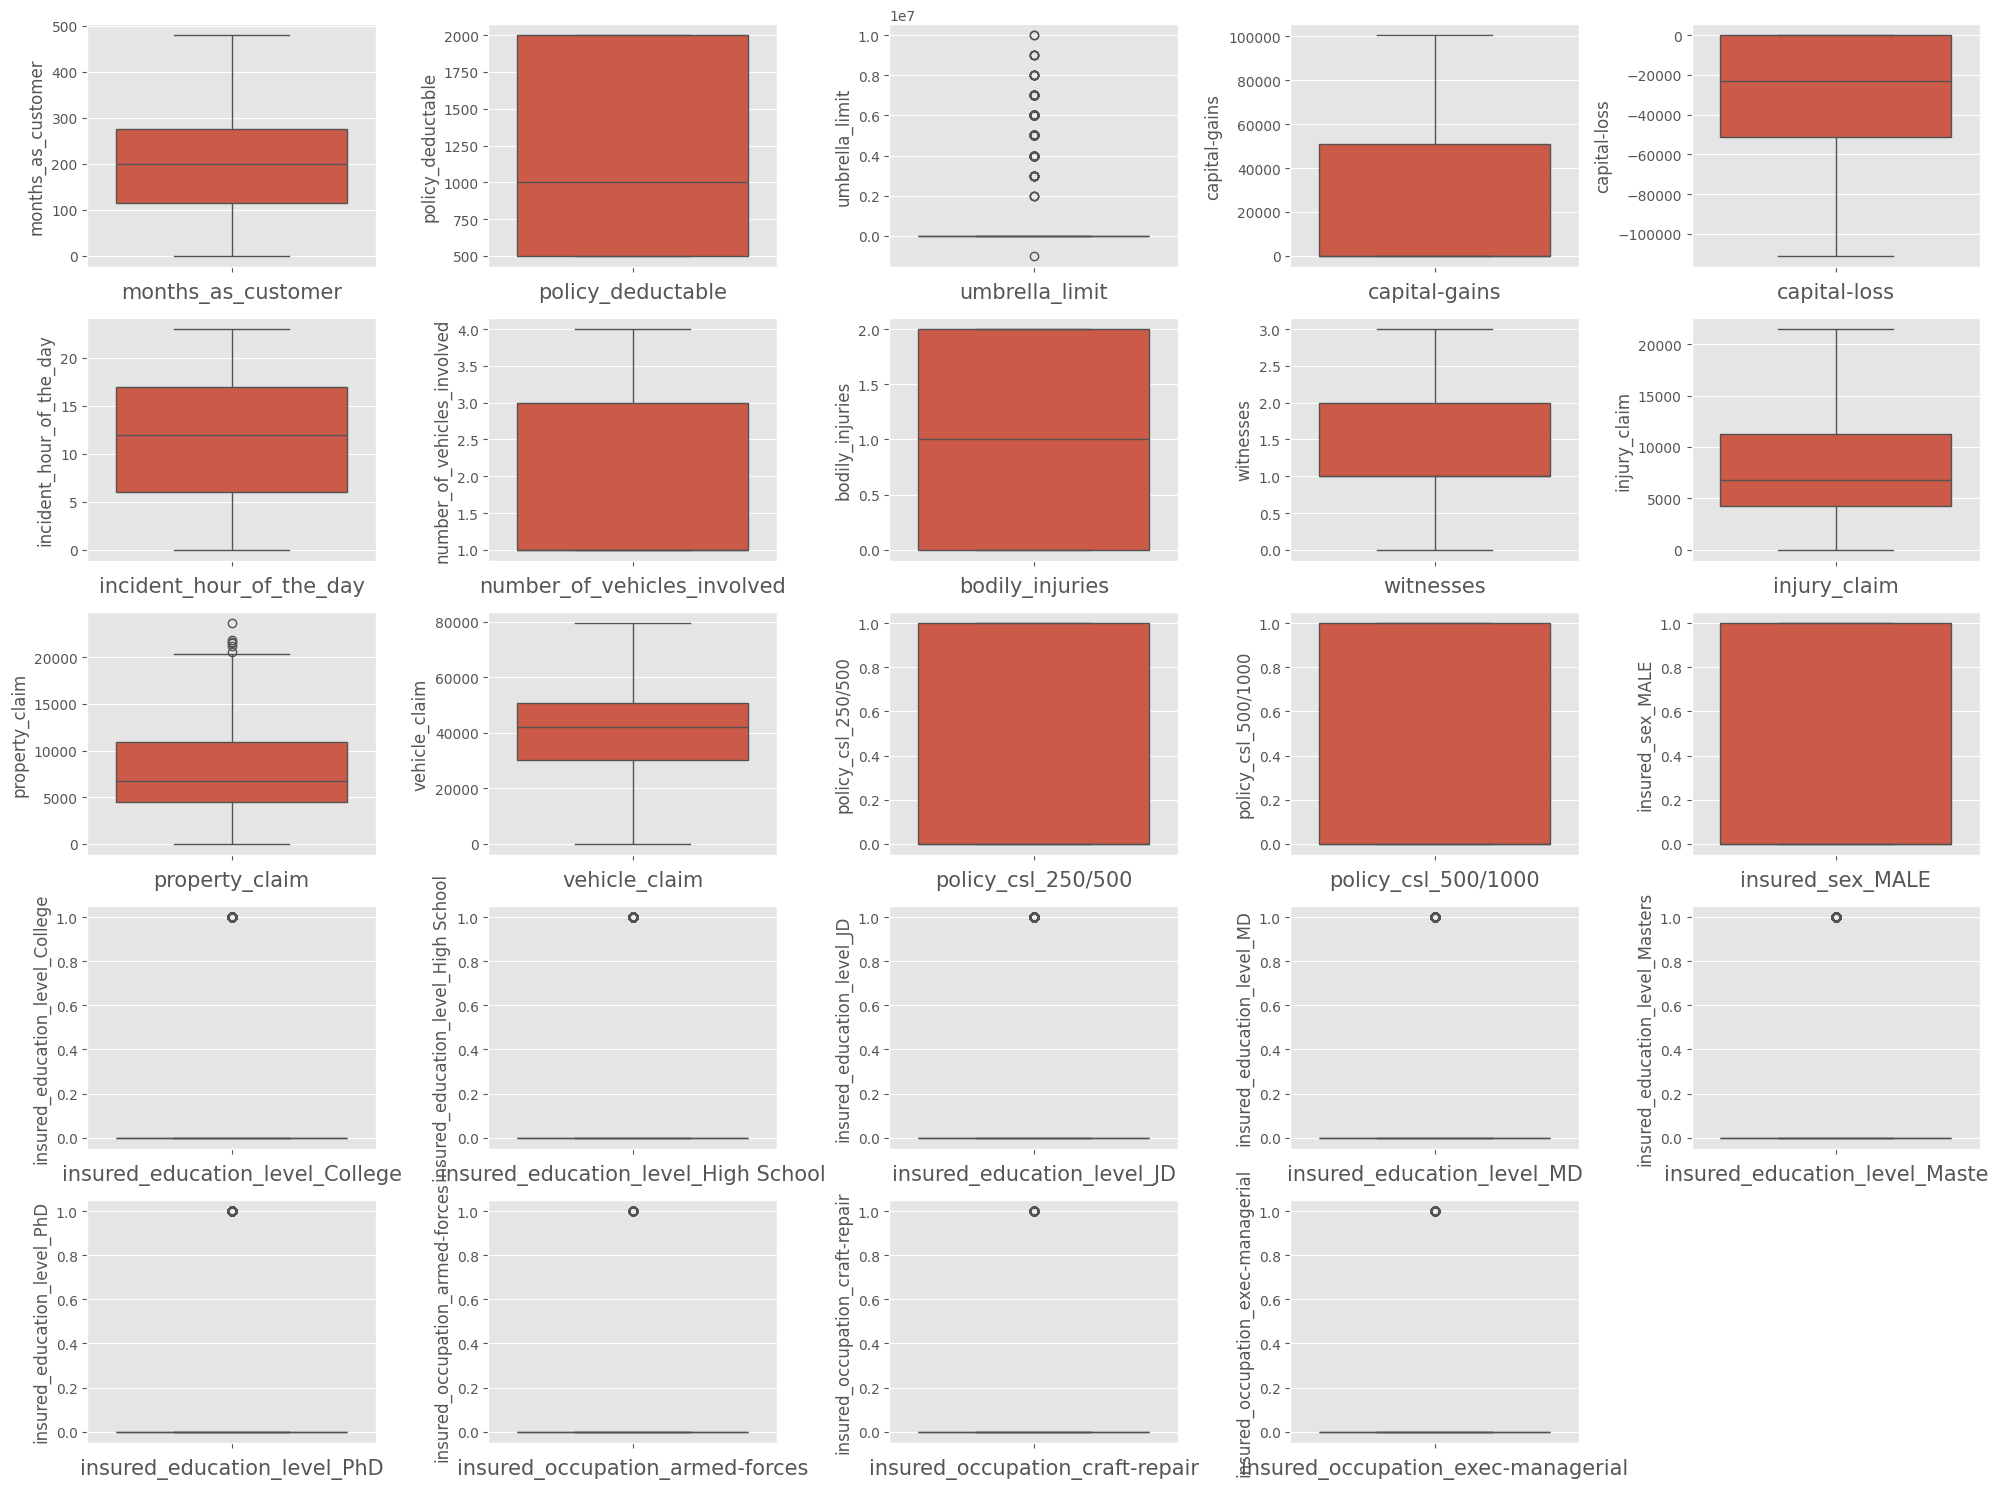

In [129]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [130]:
X

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,True,False,False,False,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,False,False,True,True,False,True,False,False,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,False,False,False,True,False,True,False,False,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,True,False,False,False,False,False,False,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,0,0,0,20,1,0,1,17440,...,False,True,False,False,False,True,False,False,True,False
996,285,1000,0,70900,0,23,1,2,3,18080,...,False,True,False,True,False,False,False,False,True,False
997,130,500,3000000,35100,0,4,3,2,3,7500,...,False,False,False,False,True,True,False,False,False,True
998,458,2000,5000000,0,0,2,1,0,1,5220,...,False,True,False,True,False,False,False,False,False,True


In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   months_as_customer                      1000 non-null   int64
 1   policy_deductable                       1000 non-null   int64
 2   umbrella_limit                          1000 non-null   int64
 3   capital-gains                           1000 non-null   int64
 4   capital-loss                            1000 non-null   int64
 5   incident_hour_of_the_day                1000 non-null   int64
 6   number_of_vehicles_involved             1000 non-null   int64
 7   bodily_injuries                         1000 non-null   int64
 8   witnesses                               1000 non-null   int64
 9   injury_claim                            1000 non-null   int64
 10  property_claim                          1000 non-null   int64
 11  vehicle_claim     

In [173]:
X.replace({True: 1, False: 0}, inplace=True)

In [174]:
y.replace({'Y': 1, 'N': 0}, inplace=True)

# Machine Learning Models

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [176]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [177]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
687,-0.094195,-1.021723,-0.489168,0.960020,-0.855061,0.739671,1.139326,-1.211098,0.443634,1.307162,2.720780,1.263562
500,-1.749713,-1.021723,-0.489168,0.949272,0.958258,0.452560,-0.820805,1.223270,1.339864,0.108737,3.366941,0.922620
332,-1.029177,-1.021723,-0.489168,1.479509,-0.936360,-0.552331,-0.820805,1.223270,0.443634,-1.324834,-1.340510,-1.810751
979,0.206028,-0.200237,-0.489168,-0.920888,-0.999985,0.739671,-0.820805,-1.211098,0.443634,0.527464,0.519275,-0.166586
817,0.386163,-1.021723,-0.489168,1.569076,-0.480379,0.596115,-0.820805,0.006086,-0.452596,1.286535,-0.126887,0.878542


In [178]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [180]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,property_damage_YES,police_report_available_YES
687,-0.094195,-1.021723,-0.489168,0.960020,-0.855061,0.739671,1.139326,-1.211098,0.443634,1.307162,...,0,0,0,1,0,1,0,0,0,0
500,-1.749713,-1.021723,-0.489168,0.949272,0.958258,0.452560,-0.820805,1.223270,1.339864,0.108737,...,0,1,0,0,1,1,0,0,0,1
332,-1.029177,-1.021723,-0.489168,1.479509,-0.936360,-0.552331,-0.820805,1.223270,0.443634,-1.324834,...,1,0,0,1,0,0,0,1,0,0
979,0.206028,-0.200237,-0.489168,-0.920888,-0.999985,0.739671,-0.820805,-1.211098,0.443634,0.527464,...,0,1,0,1,0,0,1,0,0,1
817,0.386163,-1.021723,-0.489168,1.569076,-0.480379,0.596115,-0.820805,0.006086,-0.452596,1.286535,...,0,1,0,1,0,0,0,0,0,0


In [181]:
y_train.head()

,fraud_reported
687,0
500,0
332,0
979,0
817,1


### Decision Tree

In [182]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=30)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [183]:
y_pred1 = model1.predict(X_test)

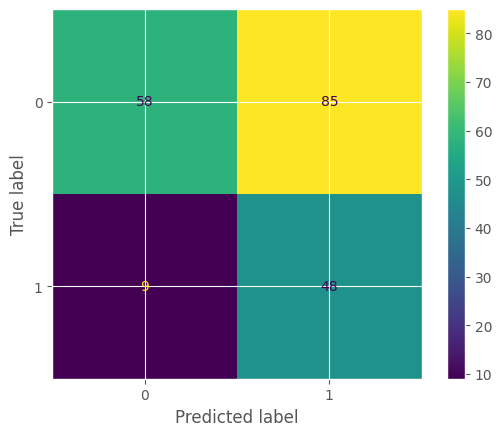

In [184]:
cf1 = confusion_matrix(y_test, y_pred1)

disp1 = ConfusionMatrixDisplay(cf1)
disp1.plot()

In [203]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.41      0.55       143
           1       0.36      0.84      0.51        57

    accuracy                           0.53       200
   macro avg       0.61      0.62      0.53       200
weighted avg       0.72      0.53      0.54       200



### K Nearest Neighbor

Top 1 - k: 1, Cross-Validation Recall: 0.2579
Top 2 - k: 3, Cross-Validation Recall: 0.1947
Top 3 - k: 5, Cross-Validation Recall: 0.1105


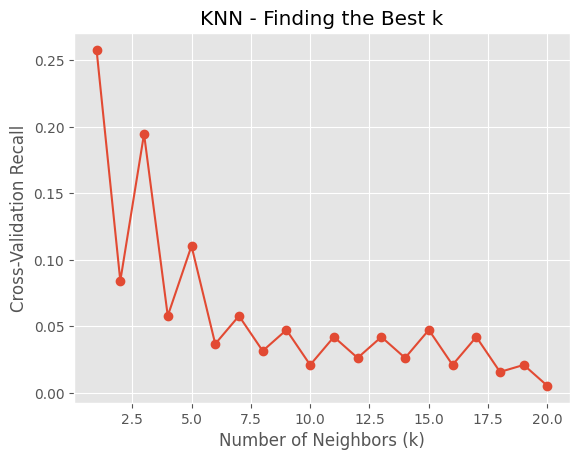

In [187]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize an empty list to store Cross-Validation Scores
'''
This will check all values from 1 to 20 and
evaluate the performance to look for the best one!
'''

k_values = range(1, 21)
cv_scores = []

# Loop over different values of k to find the best one
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')  # 5-fold cross-validation
    cv_scores.append(scores.mean())  # Average cross-validation score for this k

# Sort the scores and get the top 3 k values
top_k_indices = sorted(range(len(cv_scores)), key=lambda i: cv_scores[i], reverse=True)[:3]
top_k_values = [k_values[i] for i in top_k_indices]
top_k_scores = [cv_scores[i] for i in top_k_indices]

# Print the top 3 k values and their corresponding scores
for idx, (k, score) in enumerate(zip(top_k_values, top_k_scores)):
    print(f"Top {idx+1} - k: {k}, Cross-Validation Recall: {score:.4f}")

# Plot the results
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Recall')
plt.title('KNN - Finding the Best k')
plt.show()

In [197]:
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [195]:
y_pred2 = model2.predict(X_test)

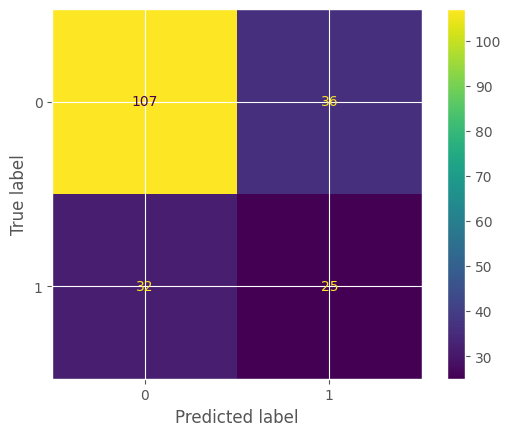

In [196]:
cf2 = confusion_matrix(y_test, y_pred2)

disp2 = ConfusionMatrixDisplay(cf2)
disp2.plot()
plt.show()

In [202]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       143
           1       0.41      0.44      0.42        57

    accuracy                           0.66       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.67      0.66      0.66       200



### Neural Network

In [198]:
import torch
from torch import nn

In [210]:
# Reconstruct after scaling

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Recreate the merge_df with the target column included
train_df = pd.concat([X_train_df, y_train_df], axis=1)
test_df = pd.concat([X_test_df, y_test_df], axis=1)

# You can now merge the train and test dataframes back together (optional)
merge_df = pd.concat([train_df, test_df], axis=0)

# Optionally, reset index if desired
merge_df.reset_index(drop=True, inplace=True)

In [211]:
merge_df

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,property_damage_YES,police_report_available_YES,fraud_reported
0,-0.094195,-1.021723,-4.891681e-01,0.960020,-0.855061,0.739671,1.139326,-1.211098,0.443634,1.307162,...,0,0,1,0,1,0,0,0,0,0
1,-1.749713,-1.021723,-4.891681e-01,0.949272,0.958258,0.452560,-0.820805,1.223270,1.339864,0.108737,...,1,0,0,1,1,0,0,0,1,0
2,-1.029177,-1.021723,-4.891681e-01,1.479509,-0.936360,-0.552331,-0.820805,1.223270,0.443634,-1.324834,...,0,0,1,0,0,0,1,0,0,0
3,0.206028,-0.200237,-4.891681e-01,-0.920888,-0.999985,0.739671,-0.820805,-1.211098,0.443634,0.527464,...,1,0,1,0,0,1,0,0,1,0
4,0.386163,-1.021723,-4.891681e-01,1.569076,-0.480379,0.596115,-0.820805,0.006086,-0.452596,1.286535,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,148.000000,500.000000,0.000000e+00,57500.000000,-93600.000000,4.000000,3.000000,2.000000,2.000000,4060.000000,...,0,0,0,1,1,0,0,0,0,0
996,269.000000,2000.000000,0.000000e+00,0.000000,-46400.000000,21.000000,1.000000,2.000000,1.000000,17180.000000,...,1,0,0,1,0,0,0,1,0,1
997,272.000000,1000.000000,0.000000e+00,0.000000,0.000000,5.000000,3.000000,1.000000,2.000000,7370.000000,...,0,0,0,1,1,0,0,0,1,1
998,109.000000,2000.000000,6.000000e+06,0.000000,0.000000,17.000000,3.000000,1.000000,3.000000,16560.000000,...,0,0,0,1,1,0,0,0,1,0


In [259]:
X_normal = merge_df[merge_df['fraud_reported']==0].drop(columns=['fraud_reported'])
X_fraud = merge_df[merge_df['fraud_reported']==1].drop(columns=['fraud_reported'])

In [260]:
X_normal_tensor = torch.tensor(X_normal.values).to(torch.float32)
X_fraud_tensor = torch.tensor(X_fraud.values).to(torch.float32)

In [288]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()

    # Encoder
    self.encoder = nn.Linear(49,3)

    # Decoder
    self.decoder = nn.Linear(3,49)

  def forward(self, x):
    latent = self.encoder(x)
    reconstructed = self.decoder(latent)
    return reconstructed

In [287]:
learning_rate = 0.001
model3 = AutoEncoder()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=learning_rate)
epochs = 10
batch_size = 5

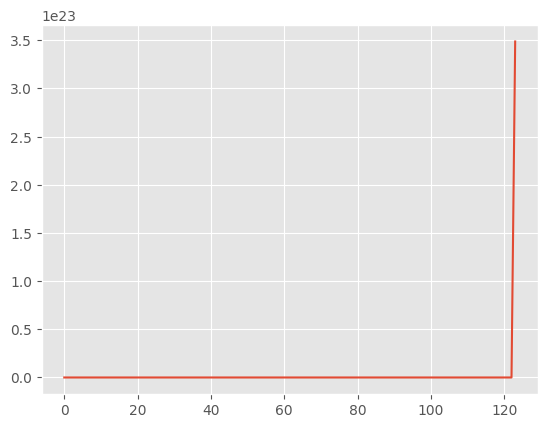

In [289]:
# Make the Training Loop

loss_values = []
model3.train()

# Set the model to training
for epoch in range(epochs):
    i = 1
    for i in range(0,len(X_normal), batch_size):
        # Pass Only the Normal Transactions
        reconst = model3(X_normal_tensor[i:i+batch_size])
        loss = loss_fn(reconst, X_normal_tensor[i:i+batch_size])

        # Back Propagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Keep track of loss
        loss_values.append(loss.item())

        print('Epoch {0} Step {1}: Loss - {2}'.format(epoch+1, i, loss.item()), end='\r')

# Print the loss curve
plt.plot(loss_values)
plt.show()


ValueError: No objects to concatenate

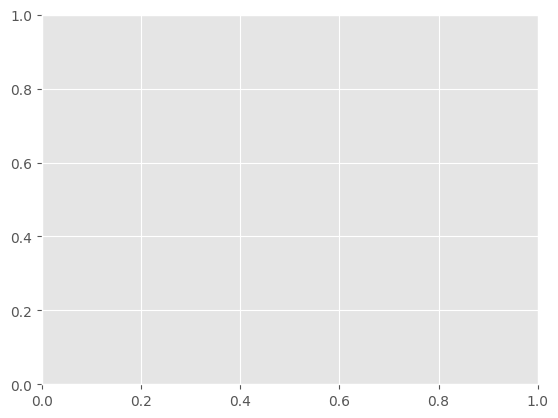

In [296]:
# Evaluate the Model

model3.eval()

normal_loss = []
fraud_loss = []

# Evaluate on Normal Data
for i in range(0, len(X_normal_tensor), batch_size):
    batch_data = X_normal_tensor[i:i + batch_size]
    if batch_data.shape[0] < batch_size:  # Handle last batch
        continue
    with torch.no_grad():
        reconst = model3(batch_data)
        loss = loss_fn(reconst, batch_data)
        normal_loss.append(loss.item())

# Evaluate on Fraud Data
for i in range(0, len(X_fraud_tensor), batch_size):
    batch_data = X_fraud_tensor[i:i + batch_size]
    if batch_data.shape[0] < batch_size:  # Handle last batch
        continue
    with torch.no_grad():
        reconst = model3(batch_data)
        loss = loss_fn(reconst, batch_data)
        fraud_loss.append(loss.item())

# Map Value
df_normal = pd.DataFrame(normal_loss, columns=['value'])
df_fraud = pd.DataFrame(fraud_loss, columns=['value'])

df_normal['category'] = 'Normal'
df_fraud['category'] = 'Fraud'

df_test = pd.concat([df_normal, df_fraud])

# Visualize
sns.histplot(data=df_test, x='value', hue='category')
plt.xlim([0, 0.25])
plt.show()

Saving

In [293]:
from joblib import dump

dump(model1, 'CSCI114_FinalProject_Group3_model1.joblib')

['CSCI114_FinalProject_Group3_model1.joblib']

In [294]:
dump(model2, 'CSCI114_FinalProject_Group3_model2.joblib')

['CSCI114_FinalProject_Group3_model2.joblib']

In [295]:
torch.save(model3.state_dict(), 'CSCI114_FinalProject_Group3_model3.pth')